In [ ]:
# 1.Aggregate skill counts monthly
# 2.Re-Analyze based on percentage of total jobs
# 3.Plot the monthly skill demand


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [25]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [26]:
df_DA_IND['job_posted_month_no'] =df_DA_IND['job_posted_date'].dt.month

In [27]:
df_DA_IND_exploded =df_DA_IND.explode('job_skills')

In [29]:
df_DA_IND_pivot = df_DA_IND_exploded.pivot_table(index='job_posted_month_no' , columns = 'job_skills' , aggfunc='size',fill_value=0)

In [30]:
df_DA_IND_pivot.loc['Total'] = df_DA_IND_pivot.sum()

In [31]:
df_DA_IND_pivot[df_DA_IND_pivot.loc['Total'].sort_values(ascending=False).index]

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_DA_IND_pivot =  df_DA_IND_pivot.drop('Total')

In [47]:
df_DA_IND_pivot

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,21,1,0,0,0,1,0,0,0,...,0,0,1,4,1,37,0,0,0,3
2,7,17,1,0,2,0,0,1,0,1,...,0,1,1,5,0,24,0,0,0,0
3,6,16,2,1,0,0,0,1,1,0,...,0,0,0,5,0,27,0,0,0,2
4,8,8,1,0,4,0,1,2,0,0,...,0,0,1,4,0,27,0,0,0,1
5,5,13,0,0,1,0,0,0,0,0,...,0,0,0,5,0,13,0,0,0,0
6,5,22,1,0,0,0,1,0,0,1,...,0,0,0,1,0,12,1,0,0,1
7,10,13,2,0,1,0,0,0,0,1,...,0,4,0,4,0,22,0,0,0,2
8,19,25,2,0,0,0,0,0,2,0,...,0,1,0,4,0,31,0,0,1,1
9,4,14,0,0,0,2,0,0,1,5,...,0,0,0,2,0,28,0,0,1,2


In [48]:
DA_totals = df_DA_IND.groupby('job_posted_month_no').size()

In [49]:
#use the div function to get the percentages

df_DA_IND_perc = df_DA_IND_pivot.div(DA_totals/1000 , axis = 0)
df_DA_IND_perc

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4.777070,33.439490,1.592357,0.000000,0.000000,0.000000,1.592357,0.000000,0.000000,0.000000,...,0.0,0.000000,1.592357,6.369427,1.592357,58.917197,0.000000,0.000000,0.000000,4.777070
2,16.166282,39.260970,2.309469,0.000000,4.618938,0.000000,0.000000,2.309469,0.000000,2.309469,...,0.0,2.309469,2.309469,11.547344,0.000000,55.427252,0.000000,0.000000,0.000000,0.000000
3,14.218009,37.914692,4.739336,2.369668,0.000000,0.000000,0.000000,2.369668,2.369668,0.000000,...,0.0,0.000000,0.000000,11.848341,0.000000,63.981043,0.000000,0.000000,0.000000,4.739336
4,19.138756,19.138756,2.392344,0.000000,9.569378,0.000000,2.392344,4.784689,0.000000,0.000000,...,0.0,0.000000,2.392344,9.569378,0.000000,64.593301,0.000000,0.000000,0.000000,2.392344
5,17.985612,46.762590,0.000000,0.000000,3.597122,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,17.985612,0.000000,46.762590,0.000000,0.000000,0.000000,0.000000
6,13.623978,59.945504,2.724796,0.000000,0.000000,0.000000,2.724796,0.000000,0.000000,2.724796,...,0.0,0.000000,0.000000,2.724796,0.000000,32.697548,2.724796,0.000000,0.000000,2.724796
7,21.881838,28.446389,4.376368,0.000000,2.188184,0.000000,0.000000,0.000000,0.000000,2.188184,...,0.0,8.752735,0.000000,8.752735,0.000000,48.140044,0.000000,0.000000,0.000000,4.376368
8,30.744337,40.453074,3.236246,0.000000,0.000000,0.000000,0.000000,0.000000,3.236246,0.000000,...,0.0,1.618123,0.000000,6.472492,0.000000,50.161812,0.000000,0.000000,1.618123,1.618123
9,6.349206,22.222222,0.000000,0.000000,0.000000,3.174603,0.000000,0.000000,1.587302,7.936508,...,0.0,0.000000,0.000000,3.174603,0.000000,44.444444,0.000000,0.000000,1.587302,3.174603


In [50]:
df_DA_IND_perc = df_DA_IND_perc.reset_index()
df_DA_IND_perc                                                        

job_skills,job_posted_month_no,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
0,1,4.777070,33.439490,1.592357,0.000000,0.000000,0.000000,1.592357,0.000000,0.000000,...,0.0,0.000000,1.592357,6.369427,1.592357,58.917197,0.000000,0.000000,0.000000,4.777070
1,2,16.166282,39.260970,2.309469,0.000000,4.618938,0.000000,0.000000,2.309469,0.000000,...,0.0,2.309469,2.309469,11.547344,0.000000,55.427252,0.000000,0.000000,0.000000,0.000000
2,3,14.218009,37.914692,4.739336,2.369668,0.000000,0.000000,0.000000,2.369668,2.369668,...,0.0,0.000000,0.000000,11.848341,0.000000,63.981043,0.000000,0.000000,0.000000,4.739336
3,4,19.138756,19.138756,2.392344,0.000000,9.569378,0.000000,2.392344,4.784689,0.000000,...,0.0,0.000000,2.392344,9.569378,0.000000,64.593301,0.000000,0.000000,0.000000,2.392344
4,5,17.985612,46.762590,0.000000,0.000000,3.597122,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,17.985612,0.000000,46.762590,0.000000,0.000000,0.000000,0.000000
5,6,13.623978,59.945504,2.724796,0.000000,0.000000,0.000000,2.724796,0.000000,0.000000,...,0.0,0.000000,0.000000,2.724796,0.000000,32.697548,2.724796,0.000000,0.000000,2.724796
6,7,21.881838,28.446389,4.376368,0.000000,2.188184,0.000000,0.000000,0.000000,0.000000,...,0.0,8.752735,0.000000,8.752735,0.000000,48.140044,0.000000,0.000000,0.000000,4.376368
7,8,30.744337,40.453074,3.236246,0.000000,0.000000,0.000000,0.000000,0.000000,3.236246,...,0.0,1.618123,0.000000,6.472492,0.000000,50.161812,0.000000,0.000000,1.618123,1.618123
8,9,6.349206,22.222222,0.000000,0.000000,0.000000,3.174603,0.000000,0.000000,1.587302,...,0.0,0.000000,0.000000,3.174603,0.000000,44.444444,0.000000,0.000000,1.587302,3.174603
9,10,16.000000,28.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,2.0,0.000000,0.000000,14.000000,0.000000,46.000000,0.000000,0.000000,4.000000,6.000000


In [51]:
df_DA_IND_perc['job_posted_month'] = df_DA_IND_perc['job_posted_month_no'].apply(lambda x:pd.to_datetime(x,format="%m").strftime("%b"))
df_DA_IND_perc

job_skills,job_posted_month_no,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,...,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom,job_posted_month
0,1,4.777070,33.439490,1.592357,0.000000,0.000000,0.000000,1.592357,0.000000,0.000000,...,0.000000,1.592357,6.369427,1.592357,58.917197,0.000000,0.000000,0.000000,4.777070,Jan
1,2,16.166282,39.260970,2.309469,0.000000,4.618938,0.000000,0.000000,2.309469,0.000000,...,2.309469,2.309469,11.547344,0.000000,55.427252,0.000000,0.000000,0.000000,0.000000,Feb
2,3,14.218009,37.914692,4.739336,2.369668,0.000000,0.000000,0.000000,2.369668,2.369668,...,0.000000,0.000000,11.848341,0.000000,63.981043,0.000000,0.000000,0.000000,4.739336,Mar
3,4,19.138756,19.138756,2.392344,0.000000,9.569378,0.000000,2.392344,4.784689,0.000000,...,0.000000,2.392344,9.569378,0.000000,64.593301,0.000000,0.000000,0.000000,2.392344,Apr
4,5,17.985612,46.762590,0.000000,0.000000,3.597122,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,17.985612,0.000000,46.762590,0.000000,0.000000,0.000000,0.000000,May
5,6,13.623978,59.945504,2.724796,0.000000,0.000000,0.000000,2.724796,0.000000,0.000000,...,0.000000,0.000000,2.724796,0.000000,32.697548,2.724796,0.000000,0.000000,2.724796,Jun
6,7,21.881838,28.446389,4.376368,0.000000,2.188184,0.000000,0.000000,0.000000,0.000000,...,8.752735,0.000000,8.752735,0.000000,48.140044,0.000000,0.000000,0.000000,4.376368,Jul
7,8,30.744337,40.453074,3.236246,0.000000,0.000000,0.000000,0.000000,0.000000,3.236246,...,1.618123,0.000000,6.472492,0.000000,50.161812,0.000000,0.000000,1.618123,1.618123,Aug
8,9,6.349206,22.222222,0.000000,0.000000,0.000000,3.174603,0.000000,0.000000,1.587302,...,0.000000,0.000000,3.174603,0.000000,44.444444,0.000000,0.000000,1.587302,3.174603,Sep
9,10,16.000000,28.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,14.000000,0.000000,46.000000,0.000000,0.000000,4.000000,6.000000,Oct


In [52]:
df_DA_IND_perc = df_DA_IND_perc.set_index('job_posted_month')
df_DA_IND_perc = df_DA_IND_perc.drop(columns='job_posted_month_no')       
df_DA_IND_perc

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,4.777070,33.439490,1.592357,0.000000,0.000000,0.000000,1.592357,0.000000,0.000000,0.000000,...,0.0,0.000000,1.592357,6.369427,1.592357,58.917197,0.000000,0.000000,0.000000,4.777070
Feb,16.166282,39.260970,2.309469,0.000000,4.618938,0.000000,0.000000,2.309469,0.000000,2.309469,...,0.0,2.309469,2.309469,11.547344,0.000000,55.427252,0.000000,0.000000,0.000000,0.000000
Mar,14.218009,37.914692,4.739336,2.369668,0.000000,0.000000,0.000000,2.369668,2.369668,0.000000,...,0.0,0.000000,0.000000,11.848341,0.000000,63.981043,0.000000,0.000000,0.000000,4.739336
Apr,19.138756,19.138756,2.392344,0.000000,9.569378,0.000000,2.392344,4.784689,0.000000,0.000000,...,0.0,0.000000,2.392344,9.569378,0.000000,64.593301,0.000000,0.000000,0.000000,2.392344
May,17.985612,46.762590,0.000000,0.000000,3.597122,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,17.985612,0.000000,46.762590,0.000000,0.000000,0.000000,0.000000
Jun,13.623978,59.945504,2.724796,0.000000,0.000000,0.000000,2.724796,0.000000,0.000000,2.724796,...,0.0,0.000000,0.000000,2.724796,0.000000,32.697548,2.724796,0.000000,0.000000,2.724796
Jul,21.881838,28.446389,4.376368,0.000000,2.188184,0.000000,0.000000,0.000000,0.000000,2.188184,...,0.0,8.752735,0.000000,8.752735,0.000000,48.140044,0.000000,0.000000,0.000000,4.376368
Aug,30.744337,40.453074,3.236246,0.000000,0.000000,0.000000,0.000000,0.000000,3.236246,0.000000,...,0.0,1.618123,0.000000,6.472492,0.000000,50.161812,0.000000,0.000000,1.618123,1.618123
Sep,6.349206,22.222222,0.000000,0.000000,0.000000,3.174603,0.000000,0.000000,1.587302,7.936508,...,0.0,0.000000,0.000000,3.174603,0.000000,44.444444,0.000000,0.000000,1.587302,3.174603


<Axes: xlabel='job_posted_month'>

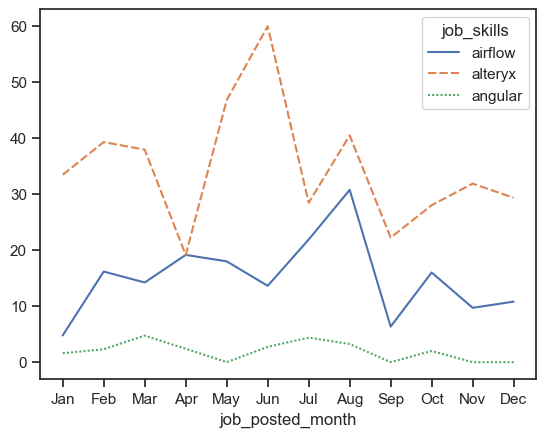

In [62]:
df_plot = df_DA_IND_perc.iloc[:,:3]
sns.lineplot(data=df_plot)


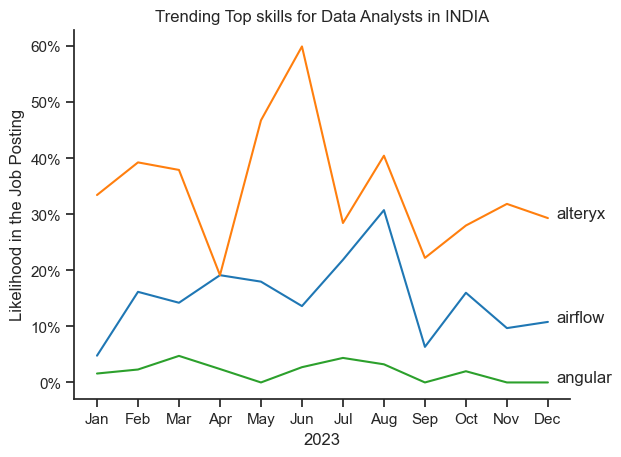

In [66]:

df_plot = df_DA_IND_perc.iloc[:,:3]
sns.lineplot(data=df_plot,dashes=False,palette="tab10")
sns.set_theme(style='ticks')
sns.despine()

plt.title("Trending Top skills for Data Analysts in INDIA")
plt.xlabel("2023")
plt.ylabel("Likelihood in the Job Posting")
plt.legend().remove()

#Here we are accessing the get current axis function , to format the y axis to show %
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())
#if the no has decimals,u can mention decimals=0 inside percentformatter(decimals=0)


for i in range(3):
    plt.text(11.2 , df_plot.iloc[-1,i] , df_plot.columns[i])
